In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os, sys
sys.path.append("../src")
from isingFunctions import *

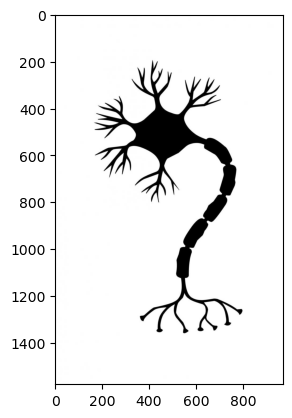

In [2]:
# Read Image
img_path = '../images/nerve.jpg'
img = mpimg.imread(img_path)
 
# Output Images
plt.imshow(img)

In [3]:
img.shape

(1577, 970, 3)

In [5]:
img_bw = np.round(img/255) # make it really bi-color (BW)

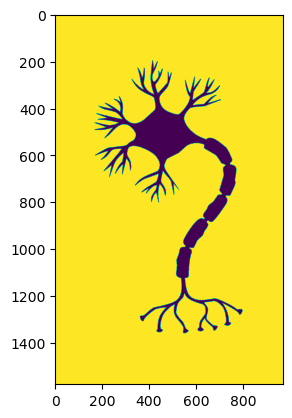

In [6]:
 # Output Images
plt.imshow(img_bw[:, :, 1])

In [8]:
l = np.max(img_bw[:, :, 1].shape)+23
c = np.min(img_bw[:, :, 1].shape)
img_bw_sq = np.ones((l, l))
s = int((l-c)/2)
img_bw_sq[11:-12, s:s+c] = img_bw[:, :, 1]

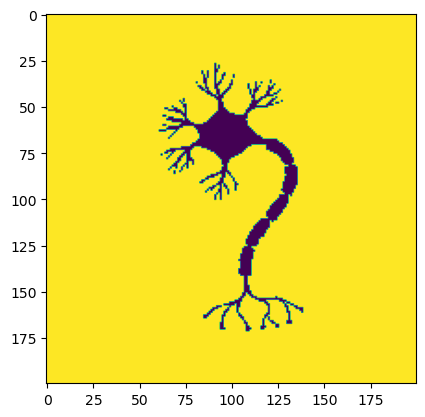

In [9]:
idx = np.arange(0, 1600, 8)
tmp = img_bw_sq[idx, :]
tmp = tmp[:, idx]
plt.imshow(tmp)

(200, 200)
(100, 100)


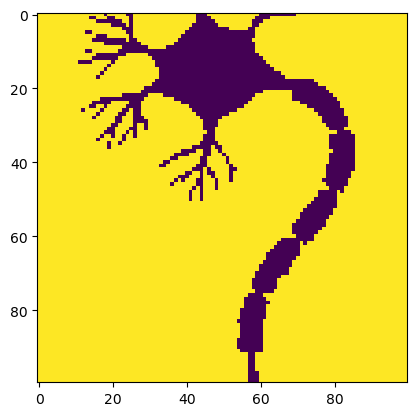

In [10]:
print(tmp.shape)
idx = np.arange(50, tmp.shape[0]-50)
tmp = tmp[idx, :]
tmp = tmp[:, idx]
print(tmp.shape)
plt.imshow(tmp)

Took :  3.3608157634735107


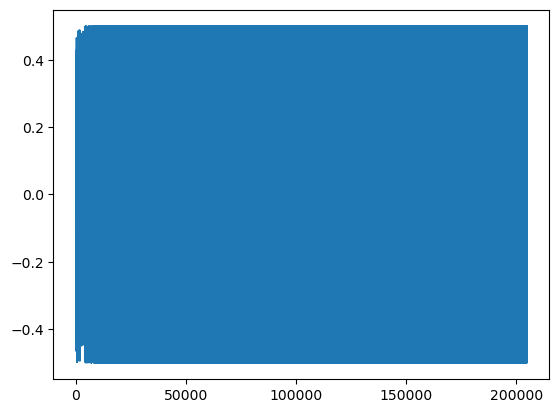

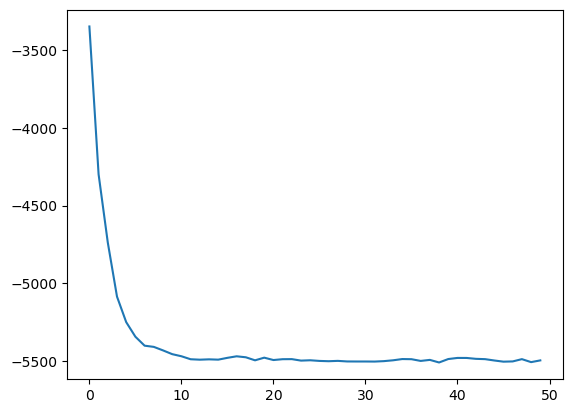

In [18]:
from isingFunctions import *
import time

# number of lines
 
L = 64
# L = 150

# number of columns
C=L;

# create image with salt and pepper image
mask = createTestImage(L,C)

# mask = tmp

C = mask.shape[0]
L = mask.shape[1]

# probability of salt and pepper noise 
p = 0.2

# create observed image corresponding to the mask:
# change the sign with probability p
ima = np.multiply(np.sign(np.random.rand(mask.shape[0], mask.shape[1])-p), mask)

# set Markov Random Field (MRF) parameter
MRF_param = 1

# build coupling matrix J setting each non-zero edge to be ferromagnetic with periodic boundary conditions
J = build_J_MFR(L, C, MRF_param)


# build vector of constants
b = -0.5*np.log(p/(1-p))*ima.reshape([ima.size, 1])


# Ising machine parameters
# feedback parameter
alpha = 0.25

# coupling parameter
beta = 0.29

# zero-mean Gaussian noise std
std = np.sqrt(0.02)

# Mach-Zehnder modulator bias
MZM_bias = np.pi/4

# DC bias
DC_bias = 1/2

# number of iterations
Nb_It = 50

# run Ising machine
t1 = time.time()
x, sigma ,HIsing = IsingMachine(J,b,alpha,beta,std,MZM_bias,DC_bias,Nb_It)
t2 = time.time()

print("Took : ", t2-t1)

plt.close('all')
#plot sample and hold photodiodee output signal evolution with iteration index
plt.figure(1000)
plt.plot(np.arange(L*C*Nb_It), np.transpose(x).reshape([x.size]))
plt.figure(2000)
plt.plot(HIsing)



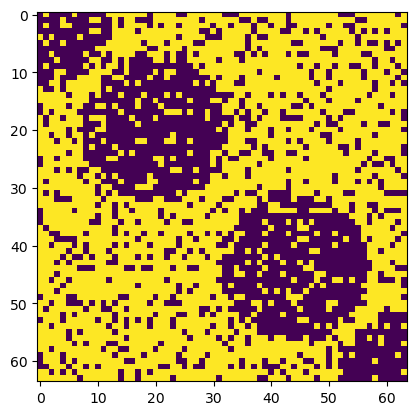

In [20]:
plt.imshow(ima)

0


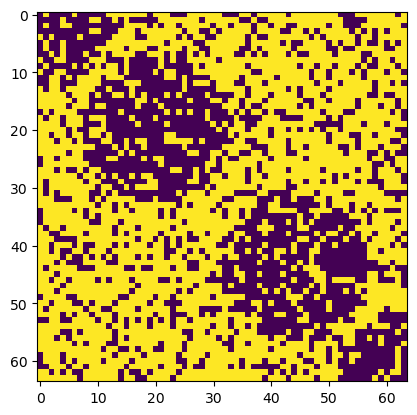

In [21]:
#convert spin vector to img
iteration = 0
plt.figure(iteration+10)
img = np.reshape(sigma[:, iteration], [L, C])
print(iteration)

plt.imshow(img)

-1


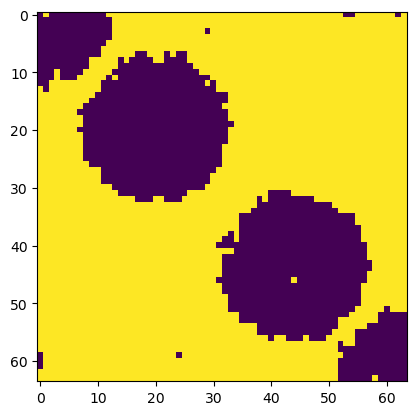

In [22]:
#convert spin vector to img
iteration = -1
plt.figure(iteration+10)
img = np.reshape(sigma[:, iteration], [L, C])
print(iteration)

plt.imshow(img)